In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [224]:
df = pd.read_csv('CreditScoring_final.csv')

In [225]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,5,owner,18,29,married,0,fixed,45,142,6000,3000,450,1678
1,ok,12,owner,36,56,married,0,fixed,75,205,5500,1950,275,300
2,ok,2,parents,36,19,married,0,fixed,35,162,4000,100,400,570
3,ok,10,owner,48,50,married,0,freelance,45,128,11500,0,500,1195
4,ok,2,parents,36,34,married,0,fixed,60,400,9800,0,900,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,ok,20,other,60,39,married,0,fixed,60,119,0,0,1300,1639
3114,default,2,priv,60,53,married,0,fixed,75,85,7000,0,1050,1172
3115,ok,8,owner,48,52,married,0,fixed,60,105,3500,0,1000,1887
3116,ok,2,owner,36,30,married,0,fixed,45,350,4000,0,800,1800


In [226]:
print(df['status'].value_counts(), end='\n\n')
print(df['home'].value_counts(), end='\n\n')
print(df['marital'].value_counts(), end='\n\n')
print(df['job'].value_counts(), end='\n\n')

status
ok         2236
default     881
Name: count, dtype: int64

home
owner      1478
rent        679
parents     538
other       239
priv        163
ignore       17
Name: count, dtype: int64

marital
married      2273
single        686
separated      82
widow          48
divorced       29
Name: count, dtype: int64

job
fixed        1948
freelance     744
partime       314
others        111
Name: count, dtype: int64



In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     3117 non-null   object
 1   seniority  3118 non-null   int64 
 2   home       3114 non-null   object
 3   time       3118 non-null   int64 
 4   age        3118 non-null   int64 
 5   marital    3118 non-null   object
 6   records    3118 non-null   int64 
 7   job        3117 non-null   object
 8   expenses   3118 non-null   int64 
 9   income     3118 non-null   int64 
 10  assets     3118 non-null   int64 
 11  debt       3118 non-null   int64 
 12  amount     3118 non-null   int64 
 13  price      3118 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 341.2+ KB


In [228]:
df.describe().astype(int)

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,3118,3118,3118,3118,3118,3118,3118,3118,3118,3118
mean,8,46,37,0,55,769853,1224097,449342,1038,1462
std,8,14,11,0,19,8740952,10973301,6686778,476,640
min,0,6,18,0,35,0,0,0,100,105
25%,2,36,28,0,35,80,0,0,700,1114
50%,5,48,36,0,51,120,3500,0,1000,1400
75%,12,60,45,0,73,166,6000,0,1300,1685
max,47,72,68,1,180,99999999,99999999,99999999,5000,11140


<Axes: >

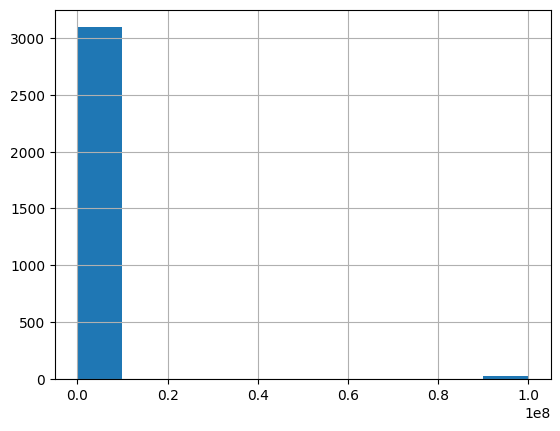

In [229]:
df.income.hist()

In [230]:
df[df.income > 1e6].income.value_counts()

income
99999999    24
Name: count, dtype: int64

In [231]:
df.income = df.income.replace({99999999: np.nan})
df.assets = df.assets.replace({99999999: np.nan})
df.debt = df.debt.replace({99999999: np.nan})

In [232]:
df.isna().sum()

status        1
seniority     0
home          4
time          0
age           0
marital       0
records       0
job           1
expenses      0
income       24
assets       38
debt         14
amount        0
price         0
dtype: int64

In [233]:
df = df[df.status.notna()]

In [234]:
pd.set_option('display.max_columns', 50) # Cate coloane pandas va afisa cand afisam un DataFrame

In [235]:
df.loc[:, 'status'] = df.status.map({
    'ok': 0,
    'default': 1
})
df = pd.get_dummies(df, columns=['home', 'marital', 'job'])
df

,status,seniority,time,age,records,expenses,income,assets,debt,amount,price,home_ignore,home_other,home_owner,home_parents,home_priv,home_rent,marital_divorced,marital_married,marital_separated,marital_single,marital_widow,job_fixed,job_freelance,job_others,job_partime
0,0,5,18,29,0,45,142.0,6000.0,3000.0,450,1678,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
1,0,12,36,56,0,75,205.0,5500.0,1950.0,275,300,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
2,0,2,36,19,0,35,162.0,4000.0,100.0,400,570,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False
3,0,10,48,50,0,45,128.0,11500.0,0.0,500,1195,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
4,0,2,36,34,0,60,400.0,9800.0,0.0,900,1316,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,0,20,60,39,0,60,119.0,0.0,0.0,1300,1639,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
3114,1,2,60,53,0,75,85.0,7000.0,0.0,1050,1172,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
3115,0,8,48,52,0,60,105.0,3500.0,0.0,1000,1887,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
3116,0,2,36,30,0,45,350.0,4000.0,0.0,800,1800,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False


In [236]:
def asses_risk(client):
    if client['income'] < 100:
        if client['job_freelance'] == 1:
            return 'default'
        else:
            return 'ok'
    
    else:
        if client['assets'] < 3000:
            return 'default'
        else:
            return 'ok'

In [237]:
asses_risk(df.loc[1])

'ok'

In [238]:
df.status.value_counts(normalize=True)

status
0    0.717356
1    0.282644
Name: proportion, dtype: float64

In [239]:
X = df.loc[:, 'seniority':]
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [240]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [241]:
df[df.debt.isnull()]

,status,seniority,time,age,records,expenses,income,assets,debt,amount,price,home_ignore,home_other,home_owner,home_parents,home_priv,home_rent,marital_divorced,marital_married,marital_separated,marital_single,marital_widow,job_fixed,job_freelance,job_others,job_partime
60,1,10,36,35,0,40,50.0,NaN,NaN,500,1050,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False
353,1,0,48,37,0,35,NaN,NaN,NaN,1500,1850,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
498,0,1,36,27,0,45,124.0,NaN,NaN,1300,1636,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
593,1,3,48,53,0,75,60.0,NaN,NaN,1500,1637,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
942,0,3,24,42,0,35,337.0,NaN,NaN,1300,1624,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
1001,1,14,36,31,0,60,0.0,NaN,NaN,700,1100,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
1479,1,27,18,47,1,75,0.0,NaN,NaN,5000,6500,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
1492,1,1,24,31,0,41,58.0,NaN,NaN,200,300,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
1619,0,14,48,46,0,60,100.0,NaN,NaN,800,1651,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
1714,0,14,24,50,0,60,92.0,NaN,NaN,1650,2261,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False


In [242]:
imputer = SimpleImputer(strategy='mean')
X_train.loc[:, ['income', 'assets', 'debt']] = imputer.fit_transform(X_train[['income', 'assets', 'debt']])
X_test.loc[:, ['income', 'assets', 'debt']] = imputer.transform(X_test[['income', 'assets', 'debt']])

In [243]:
X_train.isnull().sum()

seniority            0
time                 0
age                  0
records              0
expenses             0
income               0
assets               0
debt                 0
amount               0
price                0
home_ignore          0
home_other           0
home_owner           0
home_parents         0
home_priv            0
home_rent            0
marital_divorced     0
marital_married      0
marital_separated    0
marital_single       0
marital_widow        0
job_fixed            0
job_freelance        0
job_others           0
job_partime          0
dtype: int64

In [244]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [245]:
print('train accuracy_score: ', accuracy_score(y_train, y_pred_train))
print('test accuracy_score: ', accuracy_score(y_test, y_pred_test))
print('train f1_score: ', f1_score(y_train, y_pred_train))
print('test f1_score: ', f1_score(y_test, y_pred_test))


train accuracy_score:  1.0
test accuracy_score:  0.7158119658119658
train f1_score:  1.0
test f1_score:  0.4763779527559055


In [246]:
print(y_train.head(10))
print(pd.Series(y_pred_train).head(10))

print(y_test.head(10))
print(pd.Series(y_pred_test).head(10))

626     0
347     0
278     0
1938    0
2375    0
655     1
1350    0
1796    0
907     1
2951    1
Name: status, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    1
9    1
dtype: int64
679     0
1810    0
568     0
790     0
1767    0
801     0
756     0
1373    0
567     0
1437    0
Name: status, dtype: int64
0    0
1    0
2    0
3    1
4    1
5    1
6    0
7    0
8    0
9    0
dtype: int64


In [247]:
scores = []

for max_depth in [2, 3, 4, 5, 6, 10, 15, 20]:
    for min_samples_leaf in [1, 2, 5, 10, 20, 100]:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, class_weight='balanced')
        model.fit(X_train, y_train)

        #y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        test_f1_score = f1_score(y_test, y_pred_test)
        
        scores.append((max_depth, min_samples_leaf, test_f1_score))

In [248]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'score'])
df_scores_pivot = df_scores.pivot(index='max_depth', columns='min_samples_leaf', values='score')
df_scores_pivot

min_samples_leaf,1,2,5,10,20,100
max_depth,,,,,,
2,0.561175,0.561175,0.561175,0.561175,0.561175,0.561175
3,0.573290,0.573290,0.573290,0.573290,0.573290,0.579353
4,0.569579,0.569579,0.569579,0.565008,0.569620,0.574790
5,0.571885,0.571885,0.573248,0.567398,0.559876,0.570579
6,0.570909,0.568306,0.567273,0.558394,0.538336,0.570579
10,0.543478,0.550265,0.576857,0.566456,0.575039,0.570579
15,0.505703,0.530035,0.560976,0.558140,0.575039,0.570579
20,0.495164,0.534759,0.554217,0.556414,0.575039,0.570579


<Axes: xlabel='min_samples_leaf', ylabel='max_depth'>

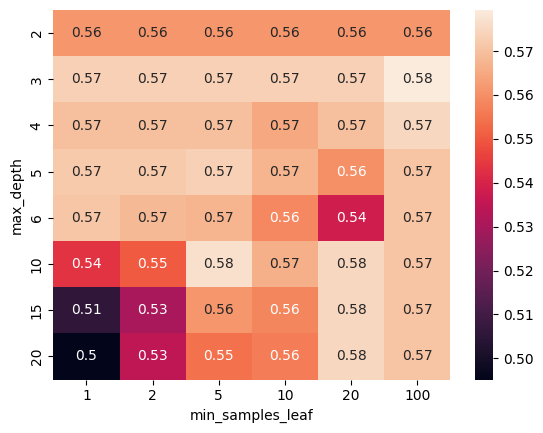

In [249]:
sns.heatmap(df_scores_pivot, annot=True)

In [260]:
df_scores_pivot.max()

min_samples_leaf
1      0.573951
2      0.583878
5      0.576200
10     0.585683
20     0.591489
100    0.531532
dtype: float64

In [250]:
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5)

In [251]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('train accuracy_score: ', accuracy_score(y_train, y_pred_train))
print('test accuracy_score: ', accuracy_score(y_test, y_pred_test))
print('train f1_score: ', f1_score(y_train, y_pred_train))
print('test f1_score: ', f1_score(y_test, y_pred_test))


train accuracy_score:  0.8610729023383769
test accuracy_score:  0.7393162393162394
train f1_score:  0.792323509252913
test f1_score:  0.5763888888888888


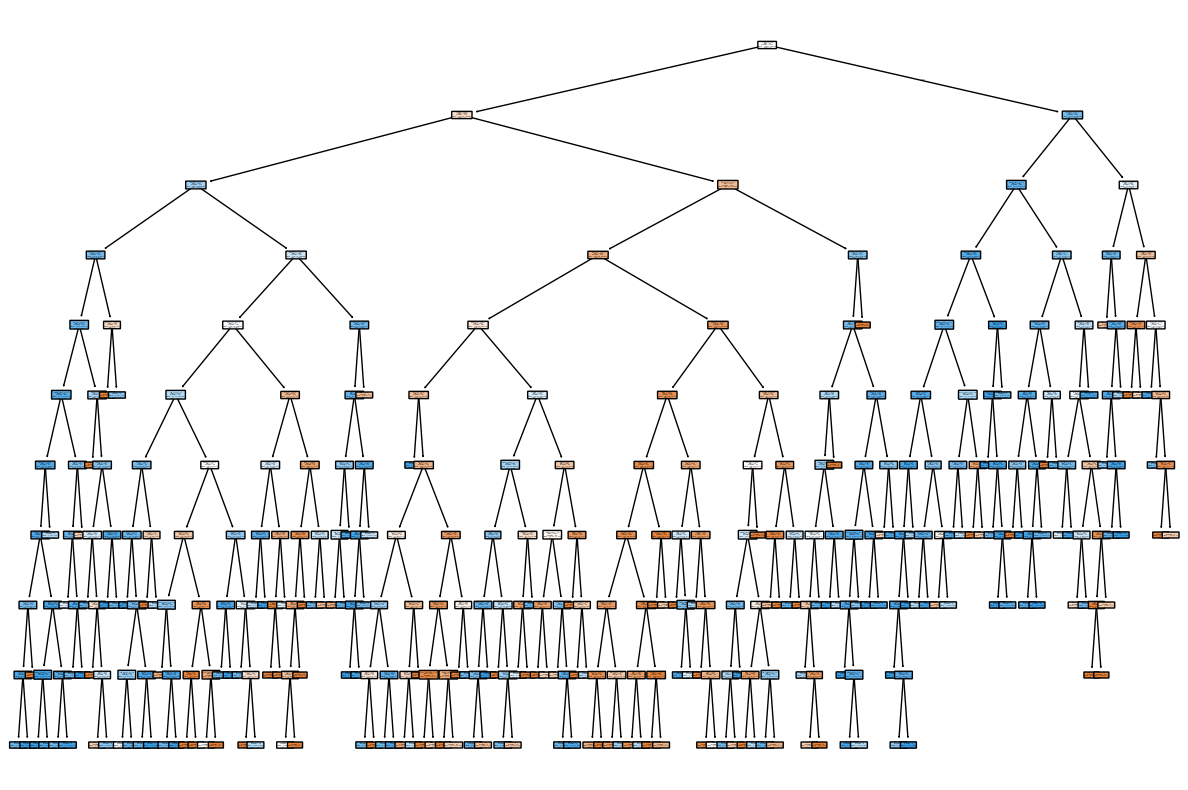

In [252]:
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['ok', 'default'], rounded=True)
plt.show()

In [253]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train) 

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('train accuracy_score: ', accuracy_score(y_train, y_pred_train))
print('test accuracy_score: ', accuracy_score(y_test, y_pred_test))
print('train f1_score: ', f1_score(y_train, y_pred_train))
print('test f1_score: ', f1_score(y_test, y_pred_test))


train accuracy_score:  1.0
test accuracy_score:  0.7948717948717948
train f1_score:  1.0
test f1_score:  0.5428571428571428


In [254]:
from tqdm import tqdm #cand folosim in for loop, in timp ce executam se afiseaza progresul, la a cata parte de indiplinirea for loopului suntem

scores = []

for max_depth in tqdm([2, 3, 4, 5, 6, 10, 15, 20]):
    for min_samples_leaf in tqdm([1, 2, 5, 10, 20, 100]):
        model = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, class_weight='balanced')
        model.fit(X_train, y_train)

        y_pred_test = model.predict(X_test)
        test_f1_score = f1_score(y_test, y_pred_test)
        
        scores.append((max_depth, min_samples_leaf, test_f1_score))

100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


In [255]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'score'])
df_scores_pivot = df_scores.pivot(index='max_depth', columns='min_samples_leaf', values='score')
df_scores_pivot

min_samples_leaf,1,2,5,10,20,100
max_depth,,,,,,
2,0.539363,0.559865,0.577114,0.565068,0.556492,0.550000
3,0.575707,0.565517,0.579216,0.554054,0.581633,0.571429
4,0.579760,0.582759,0.572899,0.570447,0.594502,0.583468
5,0.579407,0.573451,0.577391,0.561102,0.589041,0.557480
6,0.576087,0.576087,0.584229,0.584071,0.584459,0.546296
10,0.579167,0.574297,0.577947,0.579505,0.577703,0.563694
15,0.511962,0.573805,0.568138,0.584392,0.585448,0.554839
20,0.522782,0.594595,0.581749,0.588652,0.586031,0.565495


<Axes: xlabel='min_samples_leaf', ylabel='max_depth'>

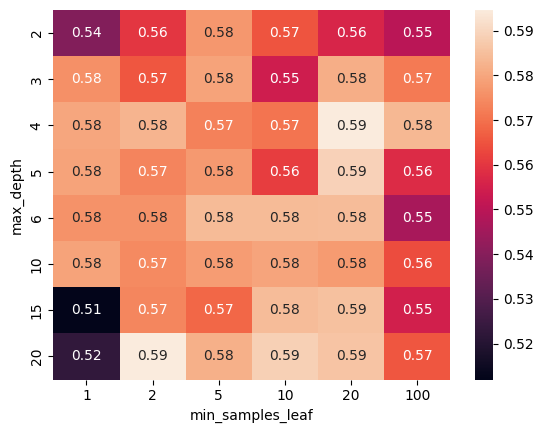

In [256]:
sns.heatmap(df_scores_pivot, annot=True)

In [259]:
df_scores_pivot.max()

min_samples_leaf
1      0.573951
2      0.583878
5      0.576200
10     0.585683
20     0.591489
100    0.531532
dtype: float64

In [257]:
model = XGBClassifier()
model.fit(X_train, y_train) 

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('train accuracy_score: ', accuracy_score(y_train, y_pred_train))
print('test accuracy_score: ', accuracy_score(y_test, y_pred_test))
print('train f1_score: ', f1_score(y_train, y_pred_train))
print('test f1_score: ', f1_score(y_test, y_pred_test))


train accuracy_score:  0.9986244841815681
test accuracy_score:  0.7767094017094017
train f1_score:  0.9976359338061466
test f1_score:  0.5485961123110151


100%|██████████| 8/8 [00:06<00:00,  1.18it/s]


<Axes: xlabel='min_samples_leaf', ylabel='max_depth'>

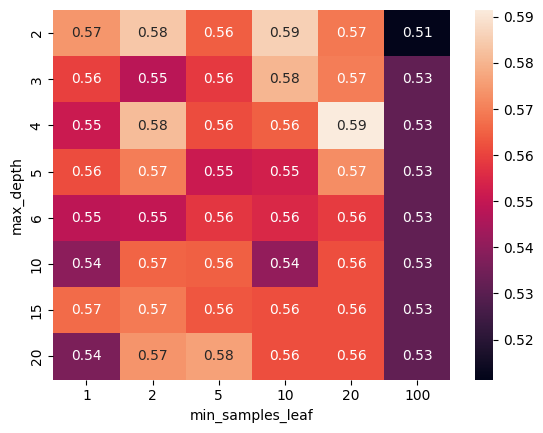

In [269]:
scores = []

for max_depth in tqdm([2, 3, 4, 5, 6, 10, 15, 20]):
    for min_child_weight in tqdm([1, 2, 5, 10, 20, 100]):
        model = XGBClassifier(n_estimators=100, max_depth=max_depth, min_child_weight=min_child_weight)
        model.fit(X_train, y_train)

        y_pred_test = model.predict(X_test)
        test_f1_score = f1_score(y_test, y_pred_test)
        
        scores.append((max_depth, min_child_weight, test_f1_score))


df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'score'])
df_scores_pivot = df_scores.pivot(index='max_depth', columns='min_samples_leaf', values='score')
sns.heatmap(df_scores_pivot, annot=True)

In [270]:
df_scores_pivot.max()

min_samples_leaf
1      0.573951
2      0.583878
5      0.576200
10     0.585683
20     0.591489
100    0.531532
dtype: float64